In [1]:
import pandas as pd

In [2]:
demo = 'C:\\Users\\USER\\Downloads\\df_final_demo.csv'
web_data1 = 'C:\\Users\\USER\\Downloads\\df_final_web_data_pt_1.csv'
web_data2 = 'C:\\Users\\USER\\Downloads\\df_final_web_data_pt_2.csv'
experiment_clients = 'C:\\Users\\USER\\Downloads\\df_final_experiment_clients.csv'
demo_df = pd.read_csv(demo)
web_data1_df = pd.read_csv(web_data1)
web_data2_df = pd.read_csv(web_data2)
experiment_clients_df = pd.read_csv(experiment_clients)


# Demo CSV Univariate Analysis

In [3]:
#Give some sample from the demo
demo_df.sample(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
2569,5001615,15.0,190.0,44.0,F,2.0,46665.23,3.0,6.0
2750,2437813,12.0,152.0,41.5,F,3.0,128571.24,3.0,6.0
22874,1096880,13.0,157.0,33.0,M,2.0,45569.55,1.0,4.0
62128,6480823,11.0,135.0,65.5,M,2.0,78361.36,7.0,7.0
19888,7205421,7.0,85.0,67.0,U,2.0,89716.97,6.0,9.0


## Dataset Overview

### The dataset consists of the following columns:

- client_id: Unique identifier for each client.
- clnt_tenure_yr: Client tenure in years.
- clnt_tenure_mnth: Client tenure in months.
- clnt_age: Age of the client.
- gendr: Gender of the client (U: Unknown, M: Male, F: Female).
- num_accts: Number of accounts the client has.
- bal: Balance of the client.
- calls_6_mnth: Number of calls in the last 6 months.
- logons_6_mnth: Number of logins in the last 6 months.

## Summary Statistics

**Measures of Central Tendency (mean, median, mode) of each numerical column**

- Mean: The average value
- Median: The middle value
- Mode: The most frequently occurring value

**Measures of Dispersion (range, variance, standard deviation and Interquartile Range (IQR))**

- Range: The difference between the maximum and minimum values.
- Variance: The average squared deviation from the mean.
- Standard Deviation: The square root of the variance, indicating how spread out the values are.
- Interquartile Range (IQR): The range between the first quartile (Q1) and the third quartile (Q3), representing the middle 50% of the data.

In [4]:
demo_df.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


## Distribution Analysis 

**Visualize the distribution of each numeric variable using histograms**

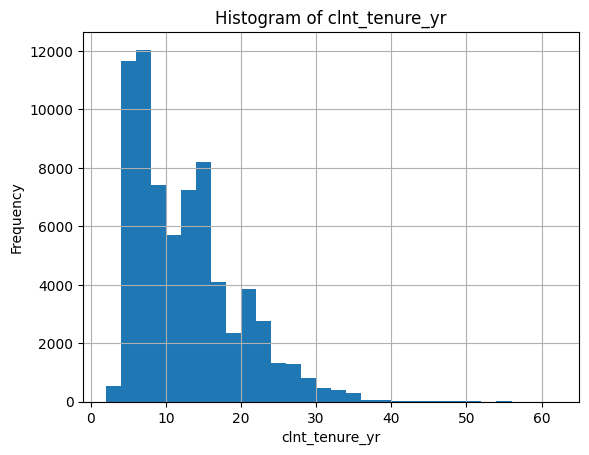

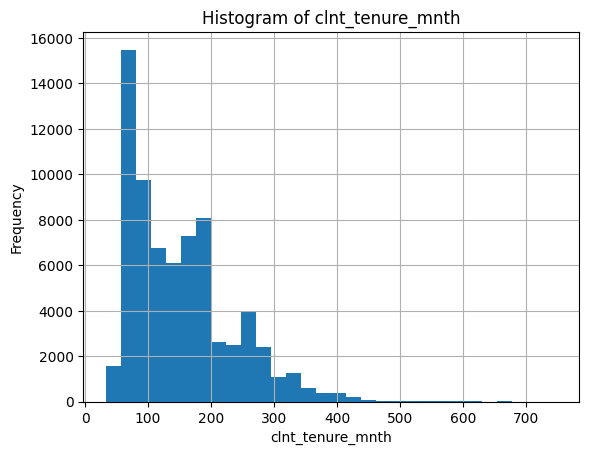

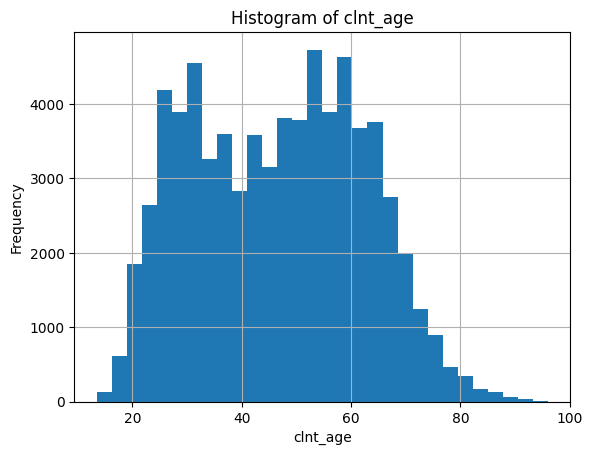

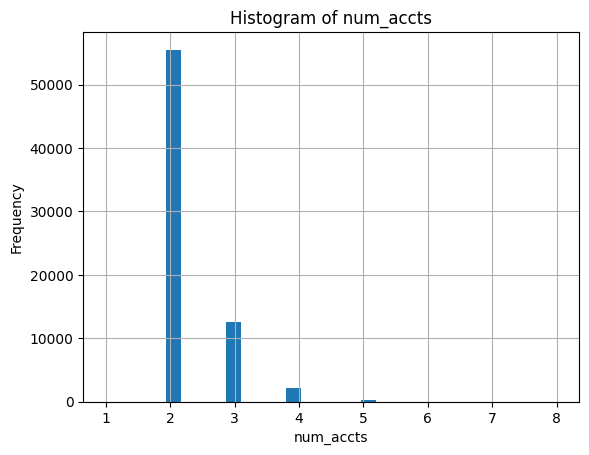

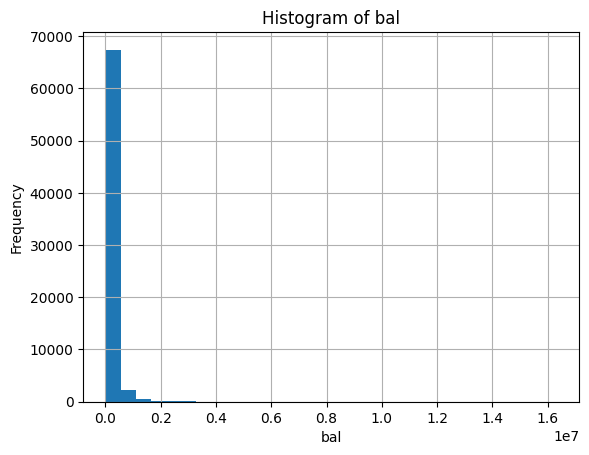

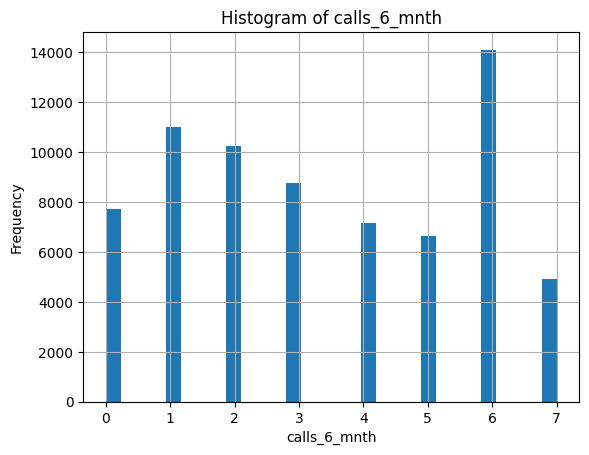

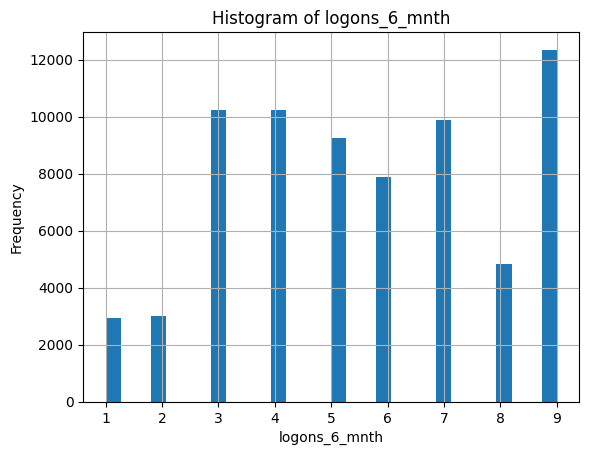

In [5]:
import matplotlib.pyplot as plt

# List of numeric columns
numeric_columns = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

# Plot histograms for each numeric column
for column in numeric_columns:
    plt.figure()
    demo_df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

- clnt_tenure_yr and clnt_tenure_mnth: Most clients have a tenure of less than 20 years or 240 months, indicating a higher concentration of newer clients.

- clnt_age: The age distribution shows that a large number of clients are between 30-60 years old, suggesting a middle-aged client base.

- num_accts: Most clients have a small number of accounts, with the majority having less than 5 accounts.

- bal: The balance is right-skewed, with many clients having lower balances, and a few having very high balances.

- calls_6_mnth: The number of calls in the past 6 months varies, with many clients not making any calls, indicating possible non-engagement or satisfaction with services.

- logons_6_mnth: Logon frequency in the past 6 months shows many clients have low interaction with online services.

## Frequency Analysis for Categorical Variables

**For categorical variables, compute the frequency or count of each category.**

In [6]:
# demo_df gendr unique values and frequency
demo_df['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

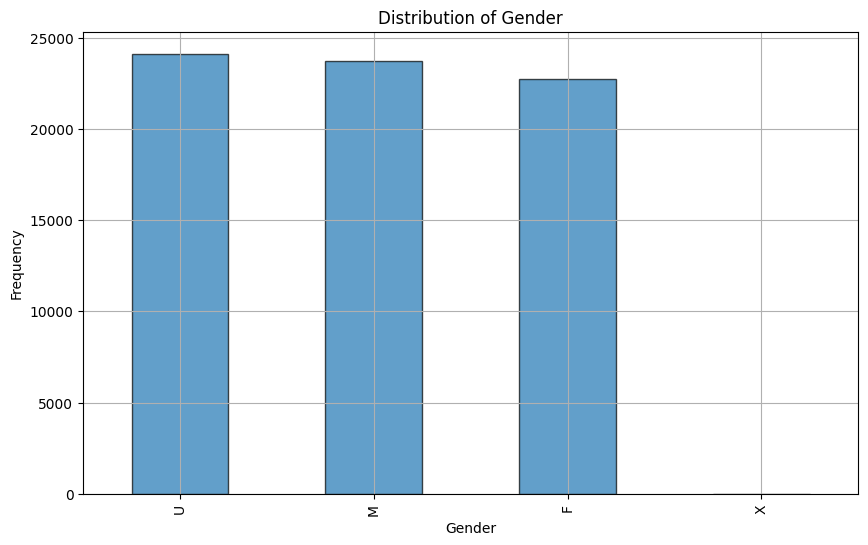

In [7]:
plt.figure(figsize=(10, 6))
demo_df['gendr'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The gendr variable shows the distribution of gender among clients:

- The majority are marked as 'U' (unknown).
- A nearly even split between 'M' (male) and 'F' (female), with 'X' (other or non-binary) being very rare.

## Missing Values Analysis

**Identifying missing values helps in understanding data quality and deciding on data imputation strategies:**

In [8]:
print('Missing values in each column:\n', demo_df.isnull().sum())

Missing values in each column:
 client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


The presence of missing values in clnt_tenure_yr, clnt_tenure_mnth, clnt_age, gendr, num_accts, bal, calls_6_mnth, and logons_6_mnth needs attention. Each has 14 or 15 missing values.

## Outlier Detection

**Identify outliers using box plots for numeric columns:**

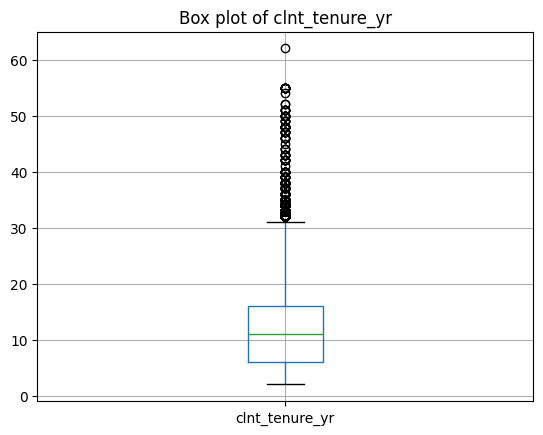

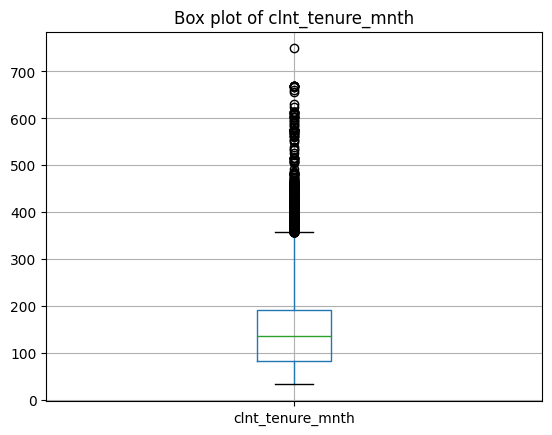

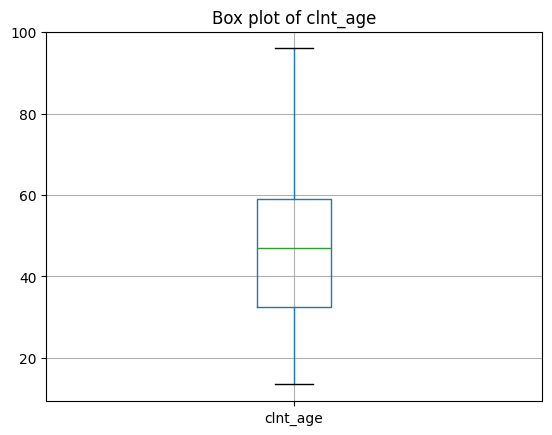

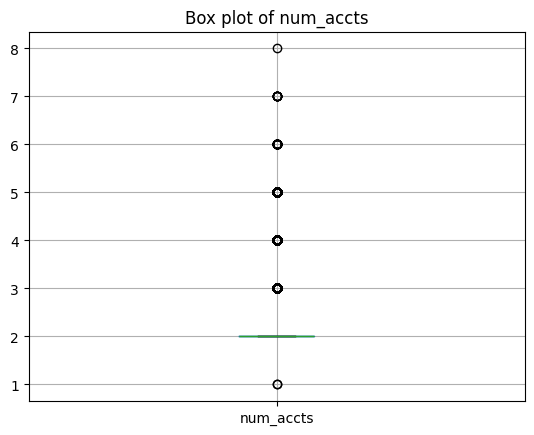

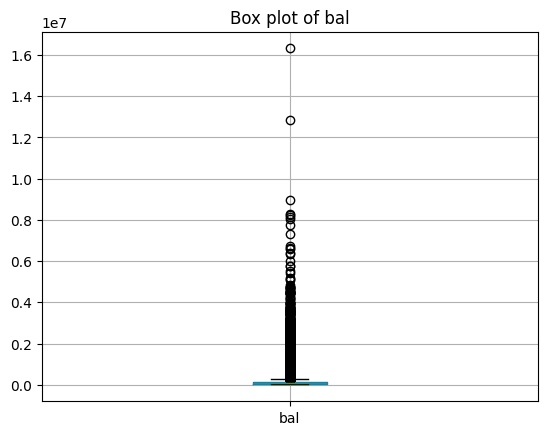

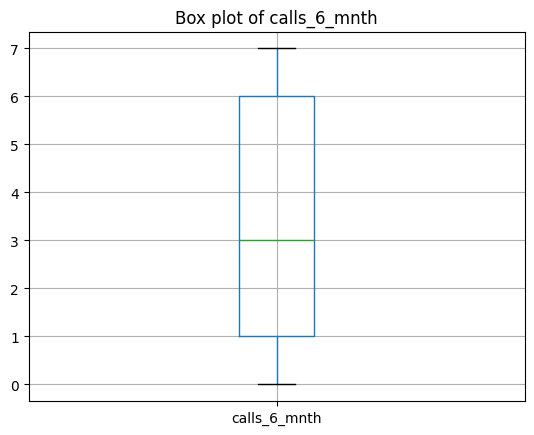

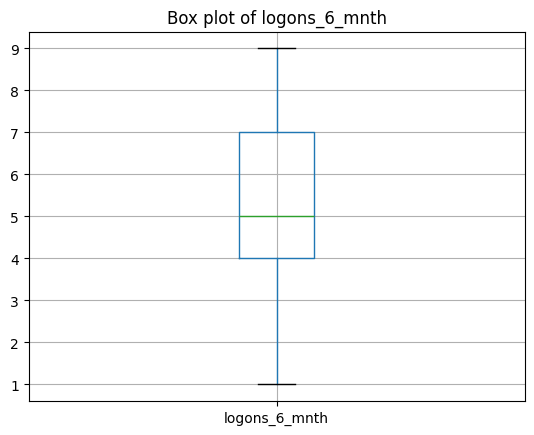

In [9]:
for column in numeric_columns:
    plt.figure()
    demo_df.boxplot(column=column)
    plt.title(f'Box plot of {column}')
    plt.show()

clnt_tenure_yr and clnt_tenure_mnth:

- Some clients have exceptionally high tenure, marking them as outliers.

clnt_age:

- A few outliers are present, possibly indicating data entry errors or truly exceptional ages.

num_accts:

- Outliers in the number of accounts show some clients having significantly more accounts than the average.

bal:

- A high number of outliers indicate a small number of clients with very high balances.

calls_6_mnth and logons_6_mnth:

- Outliers in call and logon counts indicate a few clients with exceptionally high interaction levels.

# Web Data Part 1 CSV Univariate Analysis

In [10]:
#Give some sample from the demo
web_data1_df.sample(5)

,client_id,visitor_id,visit_id,process_step,date_time
288087,1326833,885789655_22552833851,619124579_24019610629_488092,step_3,2017-03-29 19:35:46
135487,5219742,630250522_19633054842,398689513_12214454642_557259,step_2,2017-03-29 17:48:42
7822,5261313,224782373_19276356949,970641718_91254754815_331286,start,2017-04-23 13:06:08
312473,9704866,962449113_28269563783,493995752_61707130440_53165,step_1,2017-03-29 12:19:39
200083,8812865,868654346_98792945940,21706567_52881103507_287329,start,2017-03-30 17:52:22


## Dataset Overview

### The dataset consists of the following columns:

- client_id: An identifier for the client.
- visitor_id: An identifier for the visitor.
- visit_id: An identifier for the visit.
- process_step: The step in the process.
- date_time: The date and time of the step.

## Summary Statistics

- **numeric variables:** There is none numeric value in this dataframe

- **categorical variables:** client_id, visitor_id, visit_id, and process_step.

- **datetime object:** date_time

### DateTime

- Count: The total number of records with a datetime value.

- Unique: The number of unique datetime values.

- Top (Mode): The datetime value that appears most frequently in the dataset.

- Frequency of Mode: The number of times the most frequent datetime value appears.

In [11]:
web_data1_df['date_time'].describe()

count                  343141
unique                 282666
top       2017-03-29 11:24:54
freq                       14
Name: date_time, dtype: object

### Categorical Variables 

**For each categorical variable, we will:**

- Provide summary statistics.
- Plot the frequency distribution.

#### Summary Statistics and Visualizations for process_step

In [20]:
# Summary statistics for process_step
web_data1_df['process_step'].describe()

count     343141
unique         5
top        start
freq      108910
Name: process_step, dtype: object

In [21]:
# Frequency distribution for process_step
web_data1_df['process_step'].value_counts()

process_step
start      108910
step_1      73432
step_2      61768
step_3      53628
confirm     45403
Name: count, dtype: int64

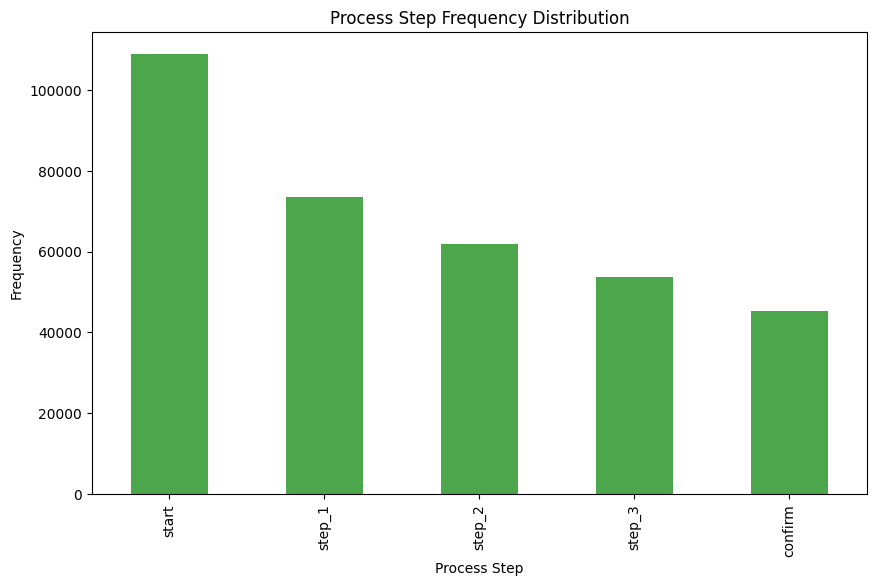

In [22]:
# Bar chart for process_step
plt.figure(figsize=(10, 6))
web_data1_df['process_step'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Process Step Frequency Distribution')
plt.xlabel('Process Step')
plt.ylabel('Frequency')
plt.show()

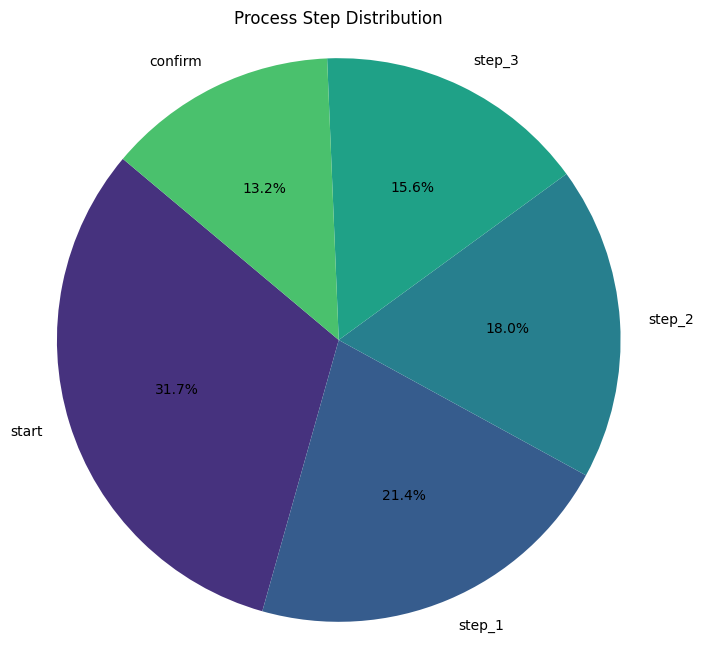

In [26]:
import seaborn as sns

plt.figure(figsize=(8, 8))
plt.pie(web_data1_df['process_step'].value_counts(), labels=web_data1_df['process_step'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Process Step Distribution')
plt.axis('equal')
plt.show()

**Summary Statistics**

- Count: 343,141

- Unique: 5

- Mode: start

- Frequency of Most Frequent: 108,910

**Frequency Distribution**

The bar chart shows the frequency distribution of each category in the process_step variable. The most frequent process step is 'start', followed by other steps with lower frequencies.

- We can see that the start step is the most common entry point.
- The end step is the least common, indicating fewer processes reach this step.

The pie chart provides a visual representation of the proportion of each process step relative to the whole dataset. It shows how each process step contributes to the overall process. By looking at the size of the slices, we can determine which process steps dominate the process and which ones are less common.

- The start slice would be the largest, indicating it has the highest proportion.
- The end slice would be the smallest, indicating it has the lowest proportion.

# Web Data Part 2 CSV Univariate Analysis

In [27]:
#Give some sample from the demo
web_data2_df.sample(5)

,client_id,visitor_id,visit_id,process_step,date_time
149534,9096887,453213846_53616317678,867594152_83457261966_395597,confirm,2017-05-26 11:03:35
338576,9120657,202484643_40770243809,799019049_74872030550_753283,step_2,2017-05-10 16:33:57
112378,526971,642063577_99780646547,449452625_9646500023_219831,step_2,2017-06-20 13:13:20
8337,1734786,962260059_39774923438,195102450_76101077764_643649,step_2,2017-06-04 16:15:15
374775,1929139,30306654_8094281106,915799432_54778329911_669170,step_1,2017-05-28 15:37:50


## Dataset Overview

### The dataset consists of the following columns:

- client_id: An identifier for the client.
- visitor_id: An identifier for the visitor.
- visit_id: An identifier for the visit.
- process_step: The step in the process.
- date_time: The date and time of the step.

## Summary Statistics

- **numeric variables:** There is none numeric value in this dataframe

- **categorical variables:** client_id, visitor_id, visit_id, and process_step.

- **datetime object:** date_time

### Categorical Variables 

**For each categorical variable, we will:**

- Provide summary statistics.
- Plot the frequency distribution.

#### Summary Statistics and Visualizations for process_step

In [29]:
# Summary statistics for process_step
web_data2_df['process_step'].describe()

count     412264
unique         5
top        start
freq      135035
Name: process_step, dtype: object

In [30]:
# Frequency distribution for process_step
web_data2_df['process_step'].value_counts()

process_step
start      135035
step_1      89761
step_2      71294
step_3      58614
confirm     57560
Name: count, dtype: int64

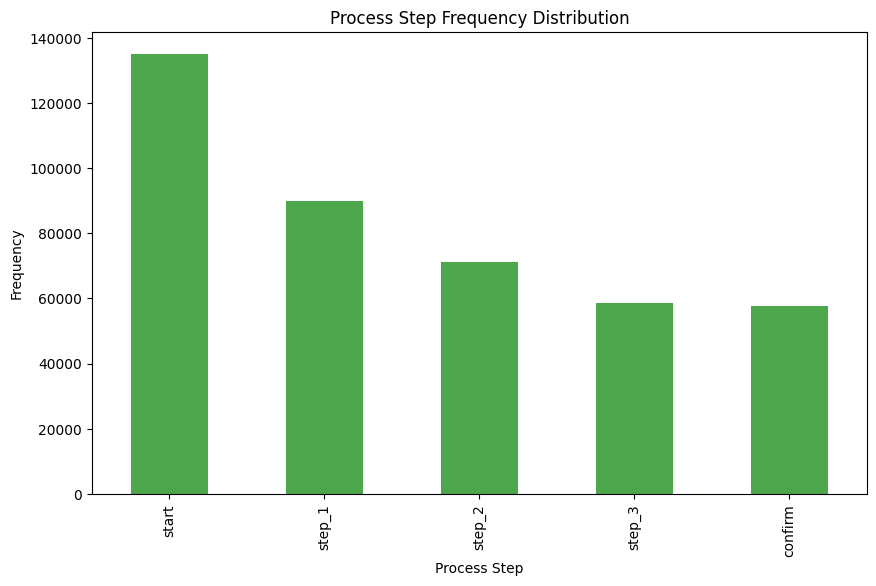

In [31]:
# Bar chart for process_step
plt.figure(figsize=(10, 6))
web_data2_df['process_step'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Process Step Frequency Distribution')
plt.xlabel('Process Step')
plt.ylabel('Frequency')
plt.show()

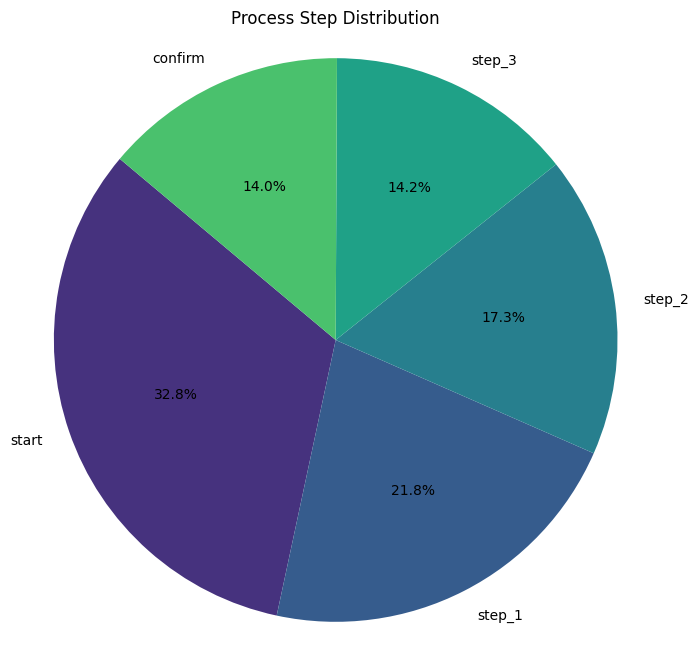

In [33]:
plt.figure(figsize=(8, 8))
plt.pie(web_data2_df['process_step'].value_counts(), labels=web_data1_df['process_step'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Process Step Distribution')
plt.axis('equal')
plt.show()

**Summary Statistics**

- Count: 412,264

- Unique: 5

- Mode: start

- Frequency of Most Frequent: 135,035

**Frequency Distribution**

The bar chart shows the frequency distribution of each category in the process_step variable. The most frequent process step is 'start', followed by other steps with lower frequencies.

- We can see that the start step is the most common entry point.
- The end step is the least common, indicating fewer processes reach this step.

The pie chart provides a visual representation of the proportion of each process step relative to the whole dataset. It shows how each process step contributes to the overall process. By looking at the size of the slices, we can determine which process steps dominate the process and which ones are less common.

- The start slice would be the largest, indicating it has the highest proportion.
- The end slice would be the smallest, indicating it has the lowest proportion.

# Experiment Clients CSV Univariate Analysis

In [34]:
#Give some sample from the dataframe
experiment_clients_df.sample(5)

,client_id,Variation
35625,4516293,Test
40201,672407,Control
22444,6283366,Control
21965,584291,Control
46325,4318672,Test


## Dataset Overview

### The dataset consists of the following columns:

- client_id: An identifier for the client.
- variation: Representation of different conditions that clients are assigned for

## Summary Statistics

- **numeric variables:** There is none numeric value in this dataframe

- **categorical variables:** client_id and variation.

### Categorical Variables 

**For each categorical variable, we will:**

- Provide summary statistics.
- Plot the frequency distribution.

#### Summary Statistics and Visualizations for variation

In [41]:
#Description of the variable
experiment_clients_df['Variation'].describe()

count     50500
unique        2
top        Test
freq      26968
Name: Variation, dtype: object

In [35]:
# Frequency counts for the Variation column
experiment_clients_df['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_25052\2410347550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Variation', data=experiment_clients_df, palette='viridis')


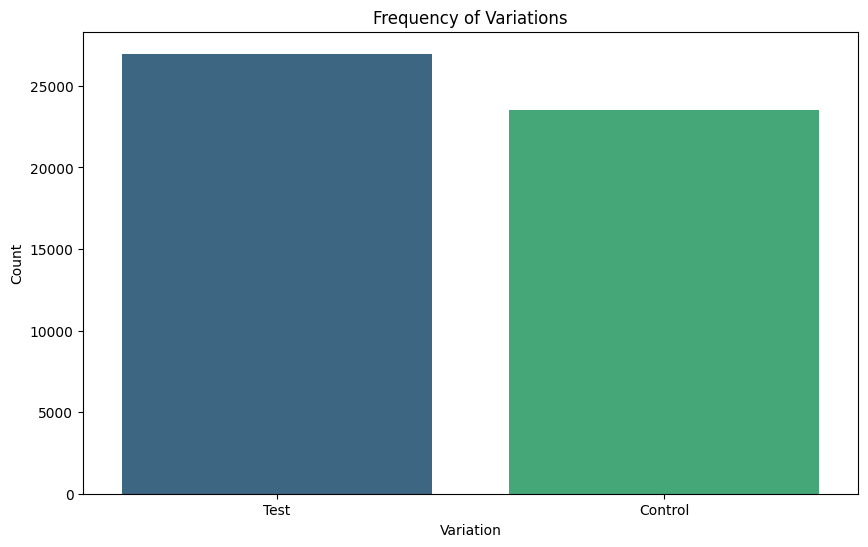

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Variation', data=experiment_clients_df, palette='viridis')
plt.title('Frequency of Variations')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [39]:
# Proportions for the Variation column
proportions = experiment_clients_df['Variation'].value_counts(normalize=True) * 100

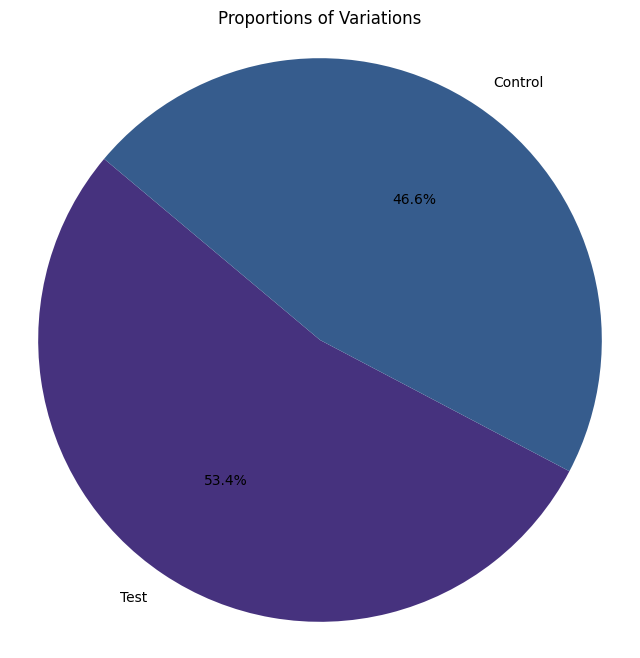

In [40]:
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Proportions of Variations')
plt.axis('equal')
plt.show()

**Summary Statistics**

- Count: 50,500

- Unique: 2

- Mode: Test

- Frequency of Most Frequent: 26,968

**Frequency Distribution**

The bar chart shows the frequency distribution of each condition in the variation variable. The most frequent process step is 'test'.

- We can see that the test condition was the one that the clients were more exposed to.

The pie chart provides a visual representation of the proportion of each condition relative to the whole dataset. It shows how both conditions contributes to the A/B testing process.

- The Test slice is the largest, indicating it has the highest proportion.
- The Control slice is the smallest, indicating it has the lowest proportion.

